#Projet données : Valentine Soly





# Détails des dataframes utilisées avec leurs chemins d'accès
general_data => https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B
ival_data => https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B
ips_data => https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-ips-lycees-ap2022/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B
ips_data_full => https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-ips_lycees/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B
dl_data => excel avec des données récoltés sur ma classe

departements.geojson => https://france-geojson.gregoiredavid.fr/
eloignement_data => https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-indice_eloignement_lycee_ap2020/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B


In [1]:
#lecture des fichiers et importation de toutes les bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

general_data = pd.read_csv('general_data.csv', sep=';')
ips_data = pd.read_csv('ips_data.csv', sep=';')
ival_data = pd.read_csv('ival_data.csv', sep=';')

<ipython-input-1-0dcea48670c8>:7: DtypeWarning: Columns (19,20,39,41,63) have mixed types. Specify dtype option on import or set low_memory=False.
  general_data = pd.read_csv('general_data.csv', sep=';')
<ipython-input-1-0dcea48670c8>:9: DtypeWarning: Columns (47,48,49,51,52,53,55,56,57,58,59,71,72,73,74,75,76,77,78,79,80,81,95,98,100,111,113,115,126,134,136) have mixed types. Specify dtype option on import or set low_memory=False.
  ival_data = pd.read_csv('ival_data.csv', sep=';')


#                           Introduction

*« L’école transforme ceux qui héritent en ceux qui méritent »*. Au sein de leur ouvrage intitulé Les Héritiers, les deux sociologues français Pierre Bourdieu et Jean Claude Passeron nous présentaient l’école comme un lieu ne récompensant pas le mérite, ne permettant ainsi pas aux plus travailleurs d’accéder aux meilleures perspectives. Dès lors, cet idéal méritocratique qui devrait être poursuivi par l’école française ne semble pas être respecté, favorisant la reproduction sociale tant pour les élites, que pour les familles les plus favorisées. Mais qu’en-est-il réellement ? Pour pouvoir mesurer le niveau social des étudiants au sein de chaque lycée et en fonction des différentes sections (générale, technologique et professionnelle), l’indice de position sociale (IPS) a été créé en 2016 par le Ministère de l’Education avant d’être rendu public en 2022. Cet indice permet de classer le niveau de position sociale des lycéens notamment à travers les PCS de leurs parents, une grille de lecture de la société française qui classe les individus en fonction de leur profession. Cet indice prend également appui sur d’autres variables influençant le niveau de réussite scolaire des élèves, plus particulièrement le diplômes des parents, les revenus, les conditions de vie et enfin l’accès à la culture ainsi que le capital culturel que lèguent les parents à leurs enfants. Il s’agira donc ici d’analyser, en nous appuyant sur des données chiffrées précises, en quoi l’IPS du lycée d’origine détermine-t-il le futur scolaire d’un élève. L’avenir d’un élève est-il conditionné par son origine sociale ou du moins le parcours scolaire de ce dernier ? L'École française favorise-t-elle la reproduction sociale et la fabrique des élites ? Certaines variables socio-démographiques comme la géographie, l’accès à la culture ou bien les revenus des parents sont elles déterminantes dans l’avenir scolaire et professionnel des élèves ? Nous envisagerons ces différentes variables au travers de données statistiques qui nous permettront de mettre en lumière les liens entre l’origine sociale et le parcours scolaire d’un individu. Pour ce faire, nous nous appuierons sur différentes statistiques, graphiques mais aussi plusieurs cartes interactives nous permettant d’illustrer notre propos.


# **Plan :**

---


1. La position sociale et le revenu des parents, sources d’inégalités scolaires et de différentes stratégies d’orientation
2. Étude de cas : Sciences Po Paris
3. L’accès à la culture comme déterminant de la réussite scolaire
4. Étude de cas : les Outre-Mer
5. L’IPS représentatif du clivage privé/public
6. Étude de cas : DL IASO de Paris Dauphine
7. Lycée général & technologique et lycée professionnel : quelles différences ?
8. L’évolution du niveau d’IPS



Avant de commencer cette étude concernant la position sociale et les IPS, j'ai souhaité avoir un vision globale et claire des différents IPS de chaque lycée de France. En ce sens, j'ai donc produit une carte du monde interactive permettant d'accéder au niveau d'IPS ainsi qu'à d'autres informations pour chacun des lycées français.

# Carte du Monde interactive représentant les IPS des lycées en fonction de l'effectif du lycée

In [2]:
#jointure sur les etablissements
ips_general_data = pd.merge(ips_data, general_data, left_on='UAI', right_on='Identifiant_de_l_etablissement')
#division colonne position en 2 colonnes : longitude et lattitude
ips_general_data[['longitude','lattitude']] = ips_general_data['position'].str.split(',', expand=True)
#selection des colonnes utiles
ips_lycée_position= ips_general_data[['UAI','longitude','lattitude','IPS Ensemble GT-PRO','Effectifs voie GT']]
#selection lycée voie G et T
ips_lycée_position_t = ips_general_data[ips_general_data['Type de lycée']=='LPO']
# Convertir en GeoDataFrame
points = gpd.points_from_xy(ips_lycée_position_t['lattitude'], ips_lycée_position_t['longitude'])
DT_lycée_GT_position = gpd.GeoDataFrame(ips_lycée_position_t, geometry=points, crs='EPSG:4326')
# Normaliser les effectifs pour ensuite pouvoir faire une carte avec la taille des points qui varie selon les effectifs
effectifs_normalized = DT_lycée_GT_position['Effectifs voie GT'] / DT_lycée_GT_position['Effectifs voie GT'].max() * 100
# Lire la carte des départements français
carte_fr = gpd.read_file('departements.geojson')
carte_fr = carte_fr.to_crs(DT_lycée_GT_position.crs)
#installation de mapclassify pour pouvoir lancer la carte interactive
!pip install mapclassify
!pip install geopandas folium

#création d'une fonction pour normaliser les effectifs
def normalize_effectifs(effectifs):
    return (effectifs - effectifs.min()) / (effectifs.max() - effectifs.min()) * 20 + 5

#nouvelle colonne des effectifs normalisés
DT_lycée_GT_position['radius'] = normalize_effectifs(DT_lycée_GT_position['Effectifs voie GT'])

#lancemement de la carte interactive
DT_lycée_GT_position.explore(
    column='IPS Ensemble GT-PRO', #commande pour ajuster la couleur des points selon IPS Ensemble GT-PRO
    cmap='seismic',
    legend=True,
    style_kwds={"style_function" : lambda x : {'radius' : x["properties"]["radius"]}} #commande pour ajuster la taille des points
)

Tout d’abord, nous nous pencherons sur l’un des facteurs socio-démographiques fondamental dans notre réussite scolaire. Les moyens financiers, comme les revenus des parents, (pris en compte dans le calcul de l’IPS) semblent conditionner les études de leurs enfants ainsi que les opportunités scolaires et professionnelles.

#1. La position sociale et le revenu des parents, sources d'inégalités scolaires et de différentes stratégies d'orientation



L’influence de l’origine sociale sur la réussite scolaire et professionnelle des individus s'explique par le capital économique de la famille. En effet, les individus décident de continuer leurs études lorsque les coûts liés à la poursuite des études sont inférieurs aux avantages attendus (principalement liés à l’obtention des diplômes). Les coûts à supporter et les avantages espérés étant différents selon les milieux sociaux afin d’acquérir des connaissances et savoirs-faire scolairement utiles. Les élèves et leurs familles réalisent un arbitrage coût-avantage au regard du risque d’échec qui est estimé par le niveau scolaire, l’âge (avance ou retard),... Ce calcul pousse les élèves des milieux favorisés à poursuivre leurs études le plus longtemps possible et les élèves de milieux populaires à choisir des études plus courtes, le coût d’opportunité étant relativement plus fort pour ces derniers, et les gains objectivement plus faibles. Les parents des enfants socialement favorisés vont davantage s’investir dans les études de leurs enfants et les encourager à poursuivre des études prestigieuses. En outre, même s’il existe des bourses afin d’aider les élèves disposant de faibles moyens financiers, le coût des études supérieurs demeure un frein important. Nous en voulons pour preuve la difficulté d’accès aux études les plus prestigieuses qui sont plus fréquemment localisées dans les grandes métropoles telle que Paris, étant souvent les villes au sein desquelles le coût de la vie est le plus élevé. Par ailleurs, l’entre-soi favorise le développement de réseaux relationnels qui va venir renforcer le rôle du capital économique dans les chances et opportunités de vie.
L’IPS (Indice de Position sociale) utilise comme critères de notation les revenus des parents d’élèves ainsi que leur position dans la grille des CSP. Il s’agit donc d’un bon indicateur pour évaluer le lien entre les revenus et les moyens financiers des parents avec la réussite scolaire.


#Carte des départements français en fonction de leurs IPS moyens

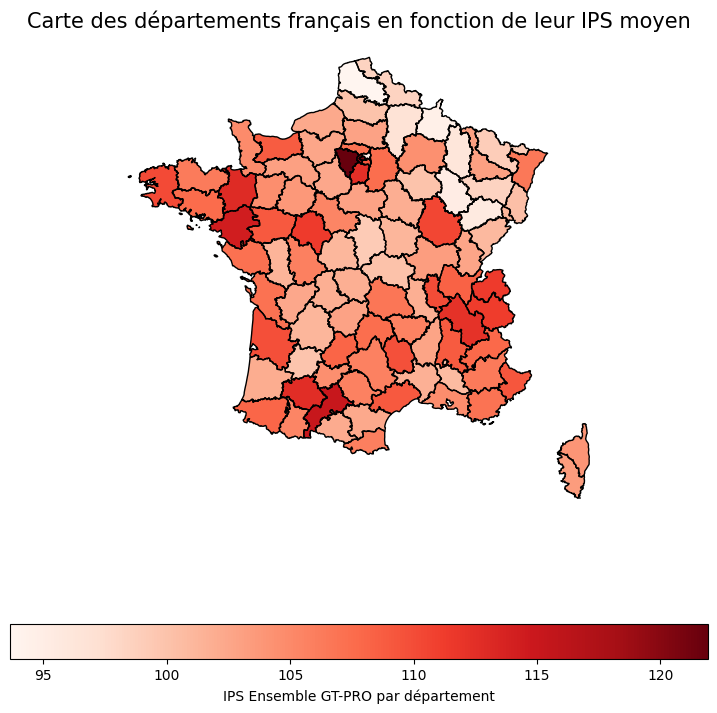

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Nous voulons faire une jointure à partir de 2 sous tables provenant des tables: ips_data et de la table carte_dep donnant les coordonnées de chaque
# département, on va faire cette jointure sur le nom des départements, mais ils sont ecrits differement selon les 2 tables : Ceux de la tables ips_data
# sont en majuscules, sans tirets, sans accents et ceux de carte_dep sont en minuscules et avec tirets et accents

# Nous allons donc modifier les noms des départements pour qu'ils correspondent dans les 2 tables


# Ici il y a un cas particulier qu'on a traité à la main: ALPLES DE HAUTES PROVENCE
ips_data['Département'] = ips_data['Département'].replace('ALPES-DE-HT-PROVENCE', 'ALPES DE HAUTE PROVENCE')
moyenne_ips_2022 = ips_data['IPS Ensemble GT-PRO'].mean()

#faire la moyenne des IPS par départements
moyenne_ips_2022_dep = ips_data[['IPS Ensemble GT-PRO','Département']].groupby('Département').mean()

#enlever les tirets de la nouvelle table des moyennes
moyenne_ips_2022_dep.index=moyenne_ips_2022_dep.index.str.replace('-', ' ')

# Télécharger et lire les données GeoJSON des départements
carte_dep = gpd.read_file('departements.geojson')

#enlever les accents de carte_dep grace à unidecode
from unidecode import unidecode
!pip install unidecode
carte_dep['nom']=carte_dep['nom'].str.upper().apply(unidecode).str.replace('-', ' ')
carte_dep.loc[carte_dep['nom']=='VENDEE']

# Cas particulier
carte_dep['nom'] = carte_dep['nom'].replace('ALPES DE HAUTE PROVENCE', 'ALPES DE HTE PROVENCE')

# La jointure tant attendue !
dep_ipsmoyen_loc = pd.merge(moyenne_ips_2022_dep, carte_dep, left_on='Département', right_on='nom')

#creation de la figure
fig, ax = plt.subplots(figsize=(9, 9))
#transforme la dataframe dep_ismoyen_loc en geodataframe
dep_ipsmoyen_loc = gpd.GeoDataFrame(dep_ipsmoyen_loc, geometry='geometry')

ax.set_axis_off()
#Afficher la carte des départements français colorée en fonction de 'IPS Ensemble GT-PRO'
dep_ipsmoyen_loc.plot(
    ax=ax,
    column='IPS Ensemble GT-PRO',
    cmap='Reds',
    legend=True,
    legend_kwds={'label': "IPS Ensemble GT-PRO par département", "orientation":'horizontal'}
)

#Ajouter les titres
ax.set_title('Carte des départements français en fonction de leur IPS moyen', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)


#Ajouter le contour des départements
dep_ipsmoyen_loc.boundary.plot(ax=ax, linewidth=1, color='black')

#Afficher la figure
plt.show()


In [5]:
#carte interactive
!pip install mapclassify
dep_ipsmoyen_loc.explore(
    column='IPS Ensemble GT-PRO',
    cmap='Reds',
    legend=True,
    legend_kwds={'label': "IPS Ensemble GT-PRO par département", "orientation":'horizontal'}
)

L'indice de position sociale (IPS) est un indicateur qui permet de mesurer la situation socio-économique des élèves et leurs familles. L'analyse de l'IPS par département révèle des inégalités importantes en termes de ressources éducatives et d'opportunités scolaires. Nous souhaitions analyser l’IPS moyen en fonction du département afin de savoir si les lycées ayant les IPS les plus élevés se situaient dans des lieux précis ou bien si la localisation était assez homogène, nous avosn donc réalisé deux cartes présentant l'IPS moyen selon chaue département. Nous remarquons notamment que certaines zones ont un IPS bien plus élevé en moyenne (le Rhône-alpes, la Bretagne, Paris et les Yvelines, la Haute-Garonne, le Gers). L’Ile-de-France se caractérise par une forte concentration de CPIS grâce à son offre de travail, ce qui se traduit par un IPS élevé. Paris et les Yvelines, en particulier, bénéficient de nombreux établissements d'enseignement réputés et d'une offre éducative diversifiée, attirant les familles aisées. Toutefois, la Seine Saint-Denis, département où de nombreuses familles modestes habitent, affiche un IPS bien plus faible que ses départements voisins. Aussi, la région Rhône-Alpes possède une économie dynamique avec une forte présence de secteurs tertiaires et de haute technologie et bénéficie du rayonnement de la métropole lyonnaise. Cela entraîne une position sociale élevée pour de nombreux habitants, reflétée par un IPS supérieur à la moyenne. Certaines zones de Bretagne, notamment autour de Rennes, bénéficient d'une économie solide et d'un tissu éducatif bien développé, conduisant à un IPS élevé.
Cependant, le Nord-Est montre globalement un IPS moyen plus faible, en particulier dans les zones industrielles anciennement prospères mais aujourd'hui en déclin. La désindustrialisation a conduit à une augmentation du chômage, tout en diminuant le niveau de vie, ce qui influence négativement l'IPS. À l'exception de quelques départements comme le Bas-Rhin où l'on retrouve Strasbourg mais aussi la Côte d'Or avec Dijon.
 Enfin, le centre de la France, composé en majeur partie de zones rurales, affiche également des IPS plus faibles. L'absence de grandes métropoles et d'industries diversifiées limite les opportunités économiques et éducatives.
Ainsi, en observant ces deux cartes, nous pouvons affirmer qu’il existe de grandes disparités entre les départements français en termes d’IPS. Nous pouvons affirmer que la majorité des départements économiquement attractifs et dynamiques, bénéficiant souvent d’une grande métropole, ont un IPS plus élevé. Cela corrobore donc bien notre idée selon laquelle la majorité des départements considérés comme riches bénéficie d’un IPS moyen élevé.



Afin d’étudier le lien entre la réussite scolaire et le niveau d’IPS des lycées, j'ai étudié le taux de mentions au sein des lycées et cela en fonction du niveau d’IPS des lycées. En ce sens, et pour mieux représenter graphiquement le lien entre ces deux variables, j'ai choisi de réaliser un nuage de points. Nous observons donc clairement une relation entre ces deux variables par le biais du graphique ; en effet, nous voyons clairement que plus le niveau d’IPS est élevé, plus le taux de mention du lycée est élevé et inversement. La réussite à l’examen du baccalauréat des élèves semble donc fortement conditionnée à l’origine sociale des étudiants.


[]

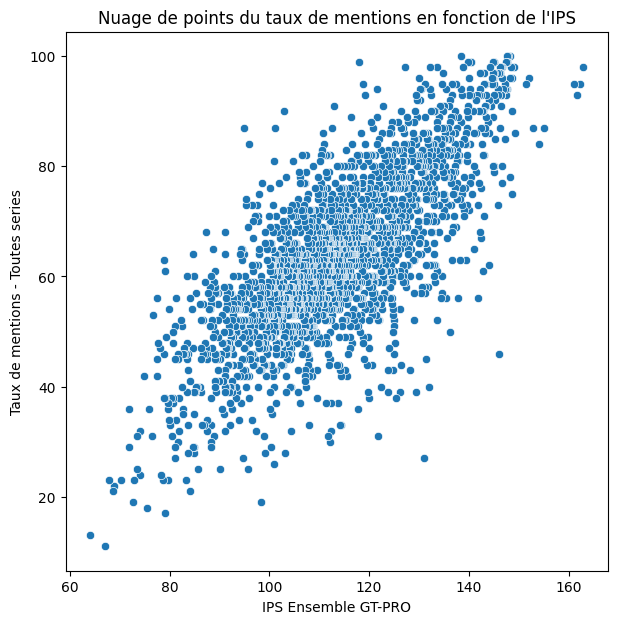

In [6]:
ival_data_2022 = ival_data[ival_data['Annee']==2022]

ips_ival = pd.merge(ips_data, ival_data_2022, left_on='UAI', right_on='UAI')
ips_taux_mention = ips_ival[['UAI',"Nom de l'établissment", 'IPS Ensemble GT-PRO','Taux de mentions - Toutes series','Taux de reussite - Toutes series',"Taux d'acces 2nde-bac","Valeur ajoutee du taux de mentions - Toutes series"]]
ips_taux_mention_triée = ips_taux_mention.sort_values(by=['IPS Ensemble GT-PRO'], ascending=False)
ips_taux_mention_triée_only = ips_taux_mention_triée[['IPS Ensemble GT-PRO','Taux de mentions - Toutes series']]
plt.figure(figsize=(7, 7))
sb.scatterplot(
    x='IPS Ensemble GT-PRO',
    y='Taux de mentions - Toutes series',
    data=ips_taux_mention_triée_only
)

# Ajouter les valeurs distinctes de l'axe des abscisses
plt.xlabel('IPS Ensemble GT-PRO')
plt.ylabel('Taux de mentions - Toutes series')
plt.title('Nuage de points du taux de mentions en fonction de l\'IPS')
plt.plot()

J'ai ensuite décidé d’analyser plus en profondeur ce lien, pour mettre en lumière la corrélation positive entre ces deux variables à travers une “heatmap”. Nous observons donc ici très clairement la corrélation entre le taux de mention des lycées et l’IPS puisque le calcul de la corrélation nous renvoie en valeur 0,74 ce qui est relativement proche de 1. Nous pouvons ici clairement affirmer qu’il existe une certaine dépendance linéaire entre les deux variables.


In [7]:
ips_taux_mention_triée_only.corr()

IPS Ensemble GT-PRO  \
IPS Ensemble GT-PRO                          1.000000   
Taux de mentions - Toutes series             0.744938   

                                  Taux de mentions - Toutes series  
IPS Ensemble GT-PRO                                       0.744938  
Taux de mentions - Toutes series                          1.000000

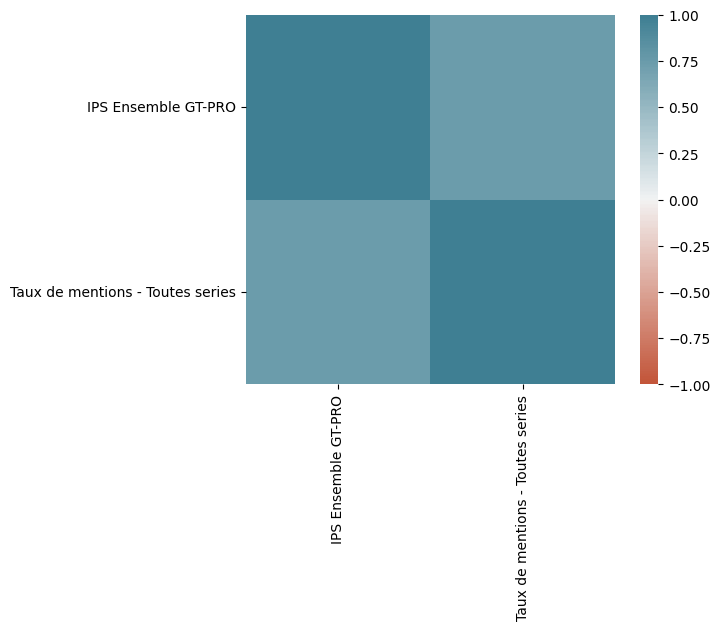

In [8]:
sb.heatmap(ips_taux_mention_triée_only.corr(), vmin=-1, vmax=1, center=0, cmap=sb.diverging_palette(20, 220, n=200), square=True)
plt.show()

Enfin, j'ai tenté d’analyser l’accès aux écoles les plus éllitistes et le lien qu’il existe entre les écoles d’élite et l’origine sociale. J'ai choisi d’étudier l’une des écoles françaises les plus prestigieuses, Polytechnique. Les CPGE sont très souvent plébiscités par les étudiants issus des familles les plus favorisées. J'ai donc récolté plusieurs données chiffrées quant aux candidats se présentant au concours de Polytechnique ainsi que des informations sur les admis à cette grande école. En ce sens, j'ai réalisé un graphique en bâtons représentant ces données pour l’année 2014-2015.


source cairn, lien : https://la-sphinx.fr/wp-content/uploads/2019/07/BerkoukFrancois.pdf

In [9]:
polytech=pd.read_csv('Demographics_of_X_Candidates.csv',sep=',')
polytech=polytech.iloc[0:7]
polytech_candidat=polytech[['Category',"Candidat à l’X"]]
polytech_candidat = polytech_candidat.set_index('Category')

plt.figure(figsize=(10, 5))
polytech_candidat.plot(kind='bar')
plt.title('Répartition des candidatures à l X par rapport au CSP')
plt.xlabel('CSP')
plt.ylabel('%')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Demographics_of_X_Candidates.csv'

In [ ]:
polytech_=polytech.iloc[0:6]
polytech_admis=polytech_[['Category',"Admis à l’X"]]
polytech_admis = polytech_admis.set_index('Category')
polytech_admis['Admis à l’X'] = pd.to_numeric(polytech_admis['Admis à l’X'])

plt.figure(figsize=(10, 5))
polytech_admis.plot(kind='bar')
plt.title('Répartition des admis à l X par rapport au CSP')
plt.xlabel('CSP')
plt.ylabel('%')
plt.xticks(rotation=90)

plt.grid(True)
plt.show()

Le graphique est particulièrement frappant puisque l'immense majorité des candidats à Polytechnique sont issus de familles de cadres avec plus de 70% des candidats. Semblablement, nous relevons une écrasante majorité d’admis, avec plus de 80% des étudiants admis ayant des parents cadres. Ces chiffres contrastent fortement avec les chiffres des enfants d’ouvriers, avec une proportion de candidats et d’admis à Polytechnique qui ne dépasse pas la barre des 5%. De fait, Polytechnique semble illustrer parfaitement les différentes stratégies d’orientation et d'investissement des familles en termes d’études, en fonction de l’origine sociale. Il semble bien y avoir une barrière à l’entrée des grandes écoles formant l’élite française pour les étudiants issus de familles modestes.


# 2. Étude de cas : Sciences Po Paris

Après avoir étudié le profil et l'origine sociale des étudiants de polytechnique, j'ai souhaité développer notre analyse sur l’origine des étudiants des grandes écoles françaises. Pour cela, j'ai choisis d’analyser la position sociale des étudiants de Sciences-Po Paris puisque cette école se veut être accessible à tous et a mis en œuvre plusieurs dispositifs comme les Convention d'Éducation Prioritaire (CEP) favorisant l’accès à l’école pour les étudiants issus des lycées prioritaires. J'ai ainsi pu récolter les données suivantes sur le profil social des admis au cours de la période 2014-2018 :


#Profil social des élèves admis à Sciences Po selon la procédure d’admission (1ère année, %, 2014-2018)

Source des données ci-dessous: https://www.enseignementsup-recherche.gouv.fr/sites/default/files/content_migration/document/Rapport_final_SELDEMENSUP_OSC_1369947.pdf

1. Via la procédure d'examen

In [10]:
data = {
    'Catégorie': [
        'Classes supérieures',
        'dont classes moyennes supérieures',
        'Classes moyennes',
        'Classes populaires',
        'Artisans, commerçants, agriculteurs'
    ],
    '2014': [85, 21, 8, 5, 2],
    '2015': [85, 21, 9, 4, 2],
    '2016': [85, 24, 9, 4, 2],
    '2017': [84, 24, 7, 5, 4],
    '2018': [84, 19, 10, 3, 3]
}

# Créer le DataFrame
pe = pd.DataFrame(data)
pe

Catégorie  2014  2015  2016  2017  2018
0                  Classes supérieures    85    85    85    84    84
1    dont classes moyennes supérieures    21    21    24    24    19
2                     Classes moyennes     8     9     9     7    10
3                   Classes populaires     5     4     4     5     3
4  Artisans, commerçants, agriculteurs     2     2     2     4     3

2. Via la procédure internationale

In [11]:
data2 = {
    'Catégorie': [
        'Classes supérieures',
        'dont classes moyennes supérieures',
        'Classes moyennes',
        'Classes populaires',
        'Artisans, commerçants, agriculteurs'
    ],
    '2014': [72, 19, 16, 9, 3],
    '2015': [79, 17, 14, 6, 2],
    '2016': [73, 19, 18, 7, 3],
    '2017': [77, 21, 14, 6, 3],
    '2018': [74, 15, 15, 8, 3]
}

# Créer le DataFrame
pi = pd.DataFrame(data2)
pi

Catégorie  2014  2015  2016  2017  2018
0                  Classes supérieures    72    79    73    77    74
1    dont classes moyennes supérieures    19    17    19    21    15
2                     Classes moyennes    16    14    18    14    15
3                   Classes populaires     9     6     7     6     8
4  Artisans, commerçants, agriculteurs     3     2     3     3     3

Nous pouvons donc observer que l’écrasante majorité des admis par la voie classique (la procédure par examen qui a été remplacée par parcoursup) sont issus des classes supérieures, plus de 80% des admis, avec une part assez importante des classes moyennes supérieures comprises entre 19% et 24%. Ces données mettent donc bien en lumière l’homogénéité sociale des admis à Sciences Po Paris par la voie classique. Nous retrouvons des chiffres relativement semblables pour les étudiants internationaux, avec une proportion plus importante d’étudiants issus des classes moyennes même si la grande majorité d'étudiants proviennent des classes supérieures.


3. Via la procédure CEP

In [12]:
data3 = {
    'Catégorie': [
        'Classes supérieures',
        'dont classes moyennes supérieures',
        'Classes moyennes',
        'Classes populaires',
        'Artisans, commerçants, agriculteurs'
    ],
    '2014': [46, 14, 17, 33, 3],
    '2015': [41, 14, 28, 27, 5],
    '2016': [40, 16, 23, 30, 7],
    '2017': [42, 17, 22, 27, 10],
    '2018': [37, 17, 25, 31, 7]
}

cep = pd.DataFrame(data3)
cep

Catégorie  2014  2015  2016  2017  2018
0                  Classes supérieures    46    41    40    42    37
1    dont classes moyennes supérieures    14    14    16    17    17
2                     Classes moyennes    17    28    23    22    25
3                   Classes populaires    33    27    30    27    31
4  Artisans, commerçants, agriculteurs     3     5     7    10     7

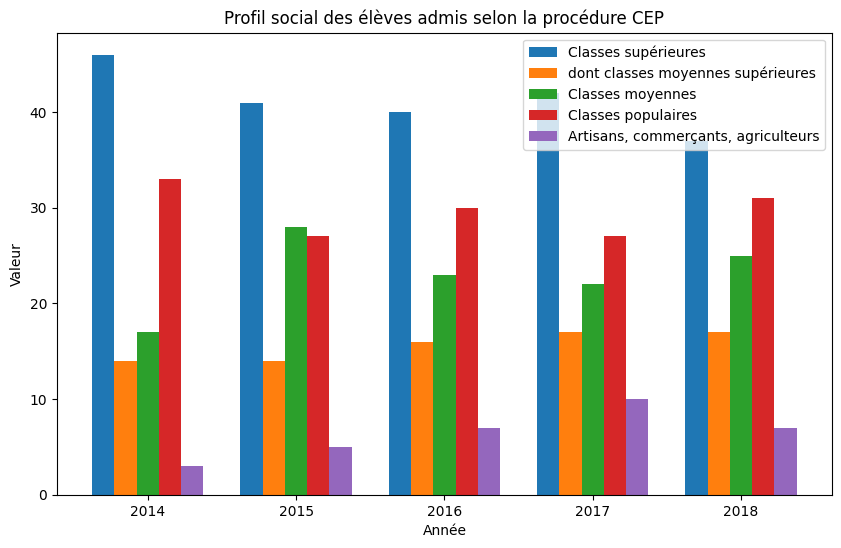

In [13]:
# Transposer le DataFrame pour avoir les années en lignes et les catégories en colonnes
cep_t = cep.set_index('Catégorie').T
cep_t
# Définir les positions des barres
bar_width = 0.15
index = range(len(cep_t))

# Créer les positions pour chaque groupe de barres
positions = [i - 2*bar_width for i in index], [i - bar_width for i in index], index, \
            [i + bar_width for i in index], [i + 2*bar_width for i in index]

# Créer le plot
fig, ax = plt.subplots(figsize=(10, 6))

# Ajouter des barres pour chaque catégorie
for pos, category in zip(positions, cep_t.columns):
    ax.bar(pos, cep_t[category], bar_width, label=category)

# Ajouter les labels, la légende et le titre
ax.set_xlabel('Année')
ax.set_ylabel('Valeur')
ax.set_title('Profil social des élèves admis selon la procédure CEP')
ax.set_xticks(index)
ax.set_xticklabels(cep_t.index)
ax.legend()

# Afficher le graphique
plt.show()

Par ailleurs, les données relatives aux admis par la voie CEP (Convention d’Éducation Prioritaire) sont particulièrement intéressantes et paradoxales. Nous pouvons remarquer que le poids des classes supérieures y est divisé par deux, celui des classes moyennes multiplié par deux ou trois, tandis que la proportion des classes populaires est quant à elle multipliée par 6 voire même par 9 si l’on prend le cas de l’année 2018. Toutefois, si cette voie d’accès a pour objectif de favoriser l’accès à cette grande école pour les étudiants issus de milieux modestes, la majorité des admis provient tout de même des classes supérieures. Nous pouvons tenter d'expliquer ce résultat par la différence en termes de résultats scolaires entre les élèves en fonction de leur origine sociale. En effet, au sein des lycées publics participant au dispositif CEP, nous pouvons supposer que les meilleurs élèves demeurent issus des classes supérieures. Ainsi, même si la proportion d’élèves issus des milieux favorisés est moins importante au sein des lycées publics, ces étudiants demeurent ceux qui réussissent le mieux à l’école et donc ceux qui vont être admis dans les meilleures universités. Cela explique donc pourquoi le poids des admis issus des classes populaires est plus important via la procédure CEP mais demeure inférieur à celui des classes supérieures.

Toutefois, la procédure d’admission classique de Sciences Po Paris a récemment été modifiée puisque l’école utilise maintenant parcoursup, la sélection ne se fait plus par concours. Cette modification paraît donc favoriser l’accès à cette grande école puisque la candidature est plus facile, tout est centralisé sur parcoursup. Néanmoins, nous n’avons pas trouvé de données assez récentes pour pouvoir analyser l’impact de la modification de la procédure d’admission mais nous pouvons supposer que cela a encouragé les étudiants issus de milieux modestes à postuler. Cette hypothèse est toutefois à nuancer puisque la nouvelle procédure d’admission contient une épreuve orale, qui peut être parfois particulièrement discriminante.


De plus, l’un des aspects majeurs déterminant notre position sociale est l’accès à la culture ainsi qu’aux connaissances, savoir-être, et aptitudes socialement valorisés possédé par les enfants favorisés.


#3. L’accès à la culture comme déterminant de la réussite scolaire

  L’une des variables sociodémographiques explicatives des choix futurs d’un individu est l’accès aux ressources ainsi que l'héritage culturel légué par les parents à leurs enfants. En ce sens, l’inégal dotation des familles en capital culturel notamment est un facteur important pour comprendre le maintien d’une forte reproduction sociale aux deux extrémités de l’échelle sociale. En effet, les enfants des classes favorisées ont toutes les chances de reproduire la position sociale de leurs parents grâce au capital culturel qu’ils peuvent mobiliser. Le capital culturel constitue l’ensemble des ressources culturelles dont dispose un individu, ce-dernier se présente sous plusieurs formes : les connaissances, la familiarité à l’égard de certains biens culturels (livres, musées, cinéma d’auteur…), les titres scolaires possédés (diplômes), les biens culturels (livres, tableaux, disques, etc.) possédés.
Les parents aisés favorisent souvent les activités culturelles ce qui offre à leurs enfants un avantage conséquent dans leur parcours. En revanche, pour les enfants des classes populaires, leur faible dotation en capital culturel et l’inégal accès aux ressources culturelles constituent un frein important dans leur réussite. Cet inégal accès aux ressources s’est polarisé avec l’avènement d’internet et des ressources en ligne ; en effet, il devient indispensable de disposer d’un matériel informatique performant afin de réussir au mieux scolairement. Selon les milieux sociaux, le capital culturel est plus ou moins éloigné de ce qui est valorisé par l’école contribuant à expliquer l’impact de l’origine sociale sur la réussite scolaire des individus. En ce sens, lorsque les parents initient dès le plus jeune âge leurs enfants à la lecture, à l’apprentissage de l’anglais, à la visite de musée … ils leur permettent d’acquérir des compétences scolairement rentables. Ils favorisent donc  leur réussite scolaire et ainsi leur ascension sociale puisqu’en France la profession exercée est conditionnée au niveau de diplôme obtenu.


source des données ci-dessous : https://www.bnsp.insee.fr/ark:/12148/bc6p0702412.pdf

In [14]:
import pandas as pd

# Pour pouvoir utiliser les datas, création d'une dataframe à partir des données trouvées sur le site de l'insee
data = {
    "Category": [
        "Ensemble", "15-24 ans", "25-44 ans", "45-64 ans", "65-74 ans", "75 ans et plus",
        "Femme", "Homme",
        "Commune rurale", "Moins de 100 000 habitants", "100 000 habitants et plus", "Unité urbaine de Paris",
        "Agriculteur exploitant", "Artisan, commerçant, chef d’entreprise", "Cadre et profession libérale", "Profession intermédiaire",
        "Employé", "Ouvrier", "Étudiant", "Chômeur et inactif",
        "1er quartile", "2eme quartile", "3eme quartile", "4eme quartile",
        "Sans diplôme", "CEP", "CAP, BEP", "BEPC", "Bac", "Supérieur"
    ],
    "Cinéma": [
        58, 72, 59, 56, 49, 48,
        66, 50,
        48, 56, 62, 71,
        31, 50, 84, 73,
        64, 33, 80, 37,
        46, 50, 61, 76,
        31, 46, 45, 68, 73, 85
    ],
    "Musée, exposition ou monument historique": [
        50, 89, 61, 40, 21, 11,
        50, 51,
        38, 43, 60, 66,
        12, 40, 71, 62,
        49, 29, 94, 34,
        39, 41, 54, 68,
        27, 19, 39, 63, 69, 80
    ],
    "Théâtre ou concert": [
        45, 46, 49, 47, 39, 28,
        45, 45,
        40, 43, 46, 54,
        24, 41, 76, 61,
        44, 27, 53, 29,
        29, 37, 48, 68,
        23, 31, 39, 48, 57, 72
    ],
    "Pratiques amateur": [
        29, 40, 31, 30, 24, 11,
        30, 28,
        22, 24, 33, 44,
        12, 24, 60, 41,
        25, 14, 44, 16,
        16, 22, 32, 49,
        12, 17, 18, 30, 41, 57
    ],
    "Autre": [
        14, 24, 16, 11, 9, 5,
        16, 12,
        12, 13, 15, 18,
        4, 13, 19, 20,
        12, 7, 29, 12,
        11, 10, 16, 19,
        6, 6, 9, 17, 22, 25
    ]
}

# création de la dataframe
culture= pd.DataFrame(data)
culture.iloc[13:18]

Category  Cinéma  \
13  Artisan, commerçant, chef d’entreprise      50   
14            Cadre et profession libérale      84   
15                Profession intermédiaire      73   
16                                 Employé      64   
17                                 Ouvrier      33   

    Musée, exposition ou monument historique  Théâtre ou concert  \
13                                        40                  41   
14                                        71                  76   
15                                        62                  61   
16                                        49                  44   
17                                        29                  27   

    Pratiques amateur  Autre  
13                 24     13  
14                 60     19  
15                 41     20  
16                 25     12  
17                 14      7


Dans l’idée d’illustrer ce propos, j'ai collecté des informations de l’INSEE relatives aux pratiques culturelles en fonction de la catégorie socioprofessionnelle. Les données sont particulièrement frappantes pour la visite de musée, exposition et monument historique ; en effet, 52% des enfants de cadres et profession libérale réalisent ces activités tandis que seulement 9% des enfants d’ouvrier visitent des musées, soit une différence de 43 points de pourcentage. La différence est moins frappante pour la lecture de livre mais elle demeure importante, plus de 80% des enfants de cadres lisent fréquemment tandis que cette proportion chute à 59% si l’on parle des enfants d'ouvriers. Ainsi, ces données chiffrées illustrent bien le fait que les familles les plus aisées favorisent davantage la pratique d’activités scolairement valorisées comme la lecture de livres ou bien la visite d’exposition ce qui in fine favorise la réussite scolaire des élèves.

Si le niveau de revenus et la catégorie socioprofessionnelle des parents sont déterminants dans l’accès aux ressources culturelles, une autre variable importante est l’éloignement des étudiants. En effet, plus un individu est éloigné des zones urbaines plus il sera difficile pour lui d’accéder aux lieux de culture. En ce sens, nous voulions analyser et déterminer s’il existe un lien entre l’indice d’éloignement et l’IPS. Pour cela, nous avons récupéré l’indice d’éloignement ainsi que l’IPS de chaque lycée avant de réaliser un nuage de points.

[]

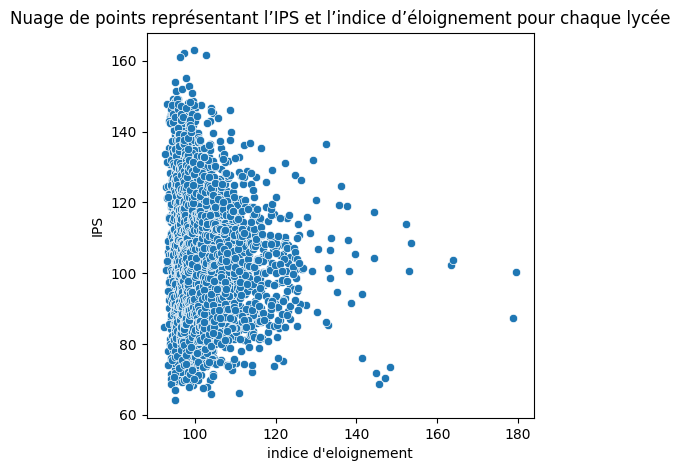

In [15]:
eloignement_data = pd.read_csv('eloignement_data.csv',sep=';')
eloignement_data_2022 = eloignement_data[eloignement_data['rentree_scolaire']==2022]
eloignement_ips = pd.merge(eloignement_data_2022, ips_data, left_on='UAI', right_on='UAI')

eloignement_ips_only = eloignement_ips[['indice_eloignement','IPS Ensemble GT-PRO']]

plt.figure(figsize=(5, 5))

sb.scatterplot(x="indice_eloignement", y="IPS Ensemble GT-PRO", data=eloignement_ips_only, )

# Ajouter les valeurs distinctes de l'axe des abscisses
plt.xlabel("indice d'eloignement")
plt.ylabel('IPS')
plt.title("Nuage de points représentant l’IPS et l’indice d’éloignement pour chaque lycée")
plt.plot()

Ce graphique ne semble pas nous permettre de conclure sur l'existence d'un lien évident entre l’indice d’éloignement et l’IPS. En effet, nous pouvons remarquer que la majorité des lycéens ayant un IPS très élevé (supérieur à 150) ont un indice d’éloignement assez faible, toujours inférieur à 110. Semblablement, les lycées ayant un un indice d’éloignement élevé (supérieur à 150) ont très rarement un IPS dépassant les 110. Cependant, il existe des lycées ayant un indice d'éloignement très faible et qui pourtant ont un IPS inférieur à 80.

In [16]:
#On calcule la matrice de corrélation entre indice d'éloignement et l'IPS Ensembel GT-PRO avec la methode Persona, puis Spearman et Kendall pour  voir si
# ces 2 variables presentent des résultats cohérents, si elles sont un peu liées ou complètement différentes.
eloignement_ips_only.corr()

indice_eloignement  IPS Ensemble GT-PRO
indice_eloignement             1.000000            -0.119941
IPS Ensemble GT-PRO           -0.119941             1.000000

In [17]:
eloignement_ips_only.corr(method="spearman")

indice_eloignement  IPS Ensemble GT-PRO
indice_eloignement             1.000000            -0.127834
IPS Ensemble GT-PRO           -0.127834             1.000000

In [18]:
eloignement_ips_only.corr(method="kendall")

indice_eloignement  IPS Ensemble GT-PRO
indice_eloignement             1.000000            -0.086034
IPS Ensemble GT-PRO           -0.086034             1.000000

On voit que le calcul des 3 matrices de corrélation présentent toutes un résultat négatif ce qui nous montrent que les deux variables ne sont pas complètement indépendantes et absurdes

Pour pouvoir analyser plus précisément le lien entre ces deux variables, j'ai calculé la corrélation entre ces deux dernières selon les trois méthodes possibles. Nous pouvons déduire à partir du calcul de ces trois corrélations qui sont négatives, que les 2 variables ne sont pas complètement indépendantes. En effet, puisque la corrélation n’est pas égale à 0, il semble que les deux variables soient quelque peu corrélées. Nos observations à travers le graphique nous permettent donc de supposer que plus l'indice d'éloignement est élevé, plus l'IPS est faible. Toutefois, nous ne pouvons pas affirmer qu'il y ait une certaine dépendance linéaire entre les deux variables (nous ne pouvons pas écrire l'une des variables comme fonction monotone de l'autre).

Nous avons analysé précédemment le niveau d’IPS moyen en fonction de chaque département, et nous avons pu en tirer plusieurs conclusions. Cependant, nous ne nous somes pas penchés dans nos cartes précédentes sur certains départements très éloignés de la France métropolitaine, les Outre-Mer.

#4. Étude de cas : les Outre-Mer
Afin d’obtenir une réflexion et une analyse plus complètes sur le lien entre l’IPS et l’ensemble des départements français, nous avons réalisé un graphique en bâton prenant en compte les départements d’Outre-mer. Les résultats que nous obtenons sont particulièrement intéressants puisque les 4 départements français ayant l’IPS le plus faible s’avèrent être des départements d’Outre-Mer. L’analyse devient d’autant plus frappante si l'on compare l’IPS moyen de Mayotte (département dont l’IPS est le plus faible) qui vaut environ 75 avec celui de l’Ile-de France qui vaut environ 120 soit une différence de 45 point d’indice IPS, ce qui est considérable. Nous avons donc cherché à analyser et à expliquer cette différence en termes d’IPS.


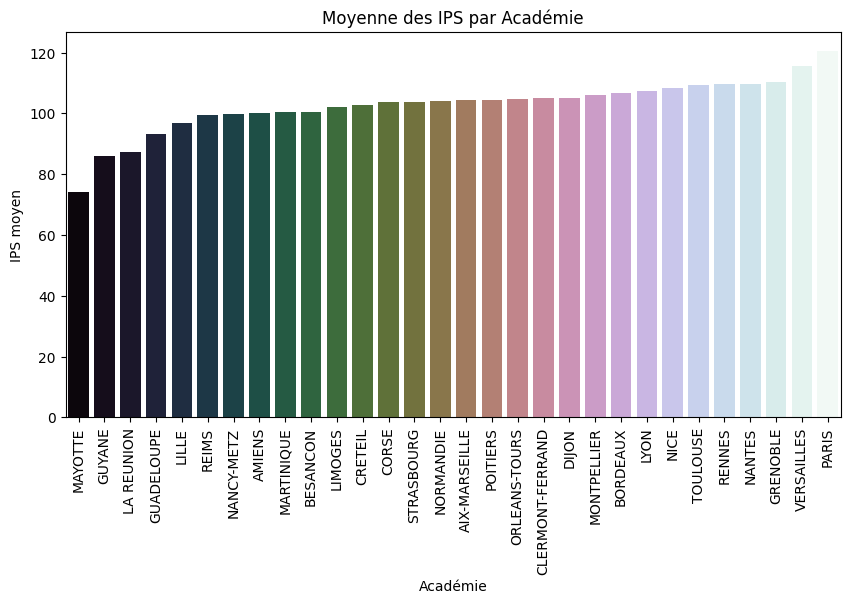

In [19]:
moyenne_ips_paracademy = ips_data[['IPS Ensemble GT-PRO','Académie']].groupby('Académie').mean()

moyenne_ips_paracademy2 = moyenne_ips_paracademy.sort_values(by='IPS Ensemble GT-PRO')

plt.figure(figsize=(10,5))
barplot2 = sb.barplot(x='Académie',hue='Académie', legend=False, y='IPS Ensemble GT-PRO', data=moyenne_ips_paracademy2, palette='cubehelix')

plt.xlabel('Académie')
plt.ylabel('IPS moyen')
plt.title('Moyenne des IPS par Académie')

plt.xticks(rotation=90)

plt.show()


Nous pouvons émettre plusieurs hypothèses pour expliquer ce niveau d’IPS plus faible. Tout d’abord, Mayotte et les autres départements d'outre-mer sont confrontés à des taux de pauvreté et de chômage beaucoup plus élevés que la moyenne nationale. À Mayotte, environ 84 % de la population vit en dessous du seuil de pauvreté et le taux de chômage est extrêmement élevé, en particulier chez les jeunes. En outre, de nombreuses familles de Mayotte n’ont pas des conditions de vie satisfaisantes, menant à un impact négatif sur les résultats scolaires des enfants, ce qui diminue le niveau d’IPS. Enfin, les infrastructures scolaires se situant à Mayotte sont souvent insuffisantes et de mauvaise qualité. Les écoles sont surchargées et ne disposent pas de ressources suffisantes, tant matérielles qu'humaines. De surcroît, les classes surchargées ont un impact négatif sur la qualité de l'éducation, entraînant une baisse des résultats scolaires et donc une baisse de l'IPS. Par ailleurs, Mayotte connaît une croissance démographique importante due à l'immigration, notamment en provenance des Comores. Cette situation exerce une pression supplémentaire sur le système éducatif, menaçant l’accès à une éducation de qualité.

# Diplômes des jeunes non scolarisés et taux de scolarisation par âge en 2020 à la Réunion
source des données : https://www.insee.fr/fr/statistiques/7764108

In [20]:
data1 = {
    'Âge révolu détaillé': [14, 15, 16, 17, 18, 19, 20, 'Ensemble'],
    'Jeunes scolarisés': [98.0, 97.2, 93.9, 88.0, 70.2, 57.4, 44.7, 79.9],
    'Jeunes non scolarisés': [1.3, 1.0, 2.8, 4.5, 7.0, 8.0, 9.2, 4.6],
    'Ensemble des jeunes scolarisés': [0.6, 1.6, 2.7, 3.3, 4.1, 5.4, 4.8, 3.1],
    'Aucun diplôme': [0.0, 0.1, 0.3, 2.8, 8.4, 11.3, 13.1, 4.8],
    'Brevet des collèges': [0.0, 0.0, 0.1, 0.4, 5.2, 8.4, 11.8, 3.4],
    'CAP, BEP': [0.0, 0.1, 0.1, 0.9, 4.9, 8.9, 11.7, 3.5],
    'Bac pro.': [0.1, 0.1, 0.1, 0.1, 0.2, 0.7, 4.7, 0.7]
}

d = pd.DataFrame(data1)
d

Âge révolu détaillé  Jeunes scolarisés  Jeunes non scolarisés  \
0                  14               98.0                    1.3   
1                  15               97.2                    1.0   
2                  16               93.9                    2.8   
3                  17               88.0                    4.5   
4                  18               70.2                    7.0   
5                  19               57.4                    8.0   
6                  20               44.7                    9.2   
7            Ensemble               79.9                    4.6   

   Ensemble des jeunes scolarisés  Aucun diplôme  Brevet des collèges  \
0                             0.6            0.0                  0.0   
1                             1.6            0.1                  0.0   
2                             2.7            0.3                  0.1   
3                             3.3            2.8                  0.4   
4                             4.1            8.4                  5.2   
5                             5.4           11.3                  8.4   
6                             4.8           13.1                 11.8   
7                             3.1            4.8                  3.4   

   CAP, BEP  Bac pro.  
0       0.0       0.1  
1       0.1       0.1  
2       0.1       0.1  
3       0.9       0.1  
4       4.9       0.2  
5       8.9       0.7  
6      11.7       4.7  
7       3.5       0.7

source : https://www.insee.fr/fr/statistiques/7764108

In [21]:
data2 = {
    'Âge': [
        '3 à 5 ans',
        '6 à 11 ans',
        '12 à 16 ans',
        'Ensemble'
    ],
    'Enfants non-scolarisés Guyane': [2556, 1509, 2142, 6207],
    'Taux Guyane (en %)': [14, 4, 7, 7],
    'Enfants non-scolarisés France métropolitaine': [178270, 127014, 91445, 396729],
    'Taux France métropolitaine (en %)': [8, 3, 2, 4]
}

# Créer le DataFrame
d2 = pd.DataFrame(data2)
d2

Âge  Enfants non-scolarisés Guyane  Taux Guyane (en %)  \
0    3 à 5 ans                           2556                  14   
1   6 à 11 ans                           1509                   4   
2  12 à 16 ans                           2142                   7   
3     Ensemble                           6207                   7   

   Enfants non-scolarisés France métropolitaine  \
0                                        178270   
1                                        127014   
2                                         91445   
3                                        396729   

   Taux France métropolitaine (en %)  
0                                  8  
1                                  3  
2                                  2  
3                                  4

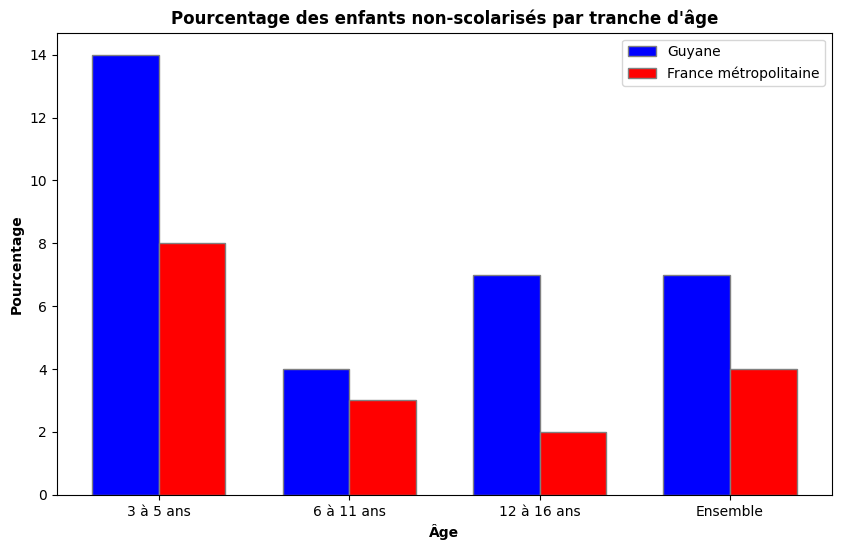

In [22]:
#largeur des barres
bar_width = 0.35

#positions des barres
r1 = range(len(d2))
r2 = [x + bar_width for x in r1]

#creation figure
fig, ax = plt.subplots(figsize=(10, 6))

#Ajouter des barres pour chaque tranche d'âge
ax.bar(r1, d2['Taux Guyane (en %)'], color='b', width=bar_width, edgecolor='grey', label='Guyane')
ax.bar(r2, d2['Taux France métropolitaine (en %)'], color='r', width=bar_width, edgecolor='grey', label='France métropolitaine')

#labels, légende, titre
ax.set_xlabel('Âge', fontweight='bold')
ax.set_ylabel('Pourcentage', fontweight='bold')
ax.set_title('Pourcentage des enfants non-scolarisés par tranche d\'âge', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(d2))])
ax.set_xticklabels(d2['Âge'])

ax.legend()
plt.show()

Les analyses proposées pour le département de Mayotte semblent donc se confirmer pour l'île de La Réunion mais aussi pour la Guyane. Nous pouvons conclure, à l'aide de ces données, que les français vivant dans les Outre Mer privilégient davantage des études courtes et ne poursuivent que peu leurs études après l'obtention du baccalauréat. Aussi, nous pouvons remarquer que le taux d'enfants non-scolarisés en Guyane semble bien supérieur à celui de la France métropolitaine. Ainsi, nous pouvons donc en déduire que les familles des Outre Mer ne semblent pas accorder une grande importance aux longues études, ce qui se traduit par un investissement plus faible dans la scolarité de leurs enfants.

#5. L’IPS représentatif du clivage privé/public

L’IPS est un indicateur particulièrement représentatif du clivage qui existe entre les lycées privés et publics ; plus précisément les différences en termes de position sociale. Tout d’abord, il existe un critère économique qui constitue un obstacle à l’entrée, seuls les plus aisés peuvent accéder aux lycées privés. Les critères de sélection rigoureux au sein des lycées privés favorisent l'admission d'élèves issus de milieux socio-économiques plus élevés. Ces critères peuvent inclure des examens d'entrée, des dossiers scolaires et des entretiens, qui sont souvent particulièrement discriminants et privilégient souvent les élèves ayant eu accès à des ressources éducatives de qualité (art du discours et de la parole,...). Seuls quelques lycées publics avaient le droit de sélectionner leurs élèves à l’entrée (Louis le Grand & Henri IV), mais ils doivent dorénavant respecter les délimitations en secteur. Au sein des établissements comptant une grande proportion d’élèves issus de milieux favorisés, les professeurs peuvent se consacrer davantage à l’apprentissage car ils n'ont pas besoin de s'attarder sur le comportement de leurs élèves.

Les lycées privés bénéficient souvent de financements supplémentaires grâce aux frais de scolarité, ce qui permet d'améliorer les infrastructures, d’offrir davantage d’activités parascolaires et culturelles mais aussi de bénéficier de matériel éducatif plus performant. Cela a pour effet d’accentuer les différences entre les élèves du public et du privé, ce qui in fine affecte leur réussite scolaire. Ainsi, les taux de réussite au baccalauréat et les mentions sont généralement plus élevés dans les lycées privés. Par exemple, certains des meilleurs lycées privés affichent des taux de réussite de 100% avec des taux de mentions très élevés​.

In [23]:
# tableau des lycées reliant leur ips à leur taux de mentions triés en fonction de leur ips
ival_data_2022 = ival_data[ival_data['Annee']==2022]
ips_ival = pd.merge(ips_data, ival_data_2022, left_on='UAI', right_on='UAI')
ips_taux_mention = ips_ival[["Nom de l'établissment","Secteur_x", 'IPS Ensemble GT-PRO','Taux de mentions - Toutes series','Taux de reussite - Toutes series',"Valeur ajoutee du taux de mentions - Toutes series"]]
ips_taux_mention_triée = ips_taux_mention.sort_values(by=['IPS Ensemble GT-PRO'], ascending=False)
ips_taux_mention_triée.shape
ips_taux_mention_triée.head(5)

Nom de l'établissment           Secteur_x  \
2088                LYCEE GENERAL PRIVE JEANNINE MANUEL  privé sous contrat   
2175       ECOLE INTERNATIONALE BILINGUE SECTION ETOILE  privé sous contrat   
1285       LYCEE D ENSEIGNEMENT GENERAL FRANCO ALLEMAND              public   
2178  ECOLE ACTIVE JEANNINE MANUEL (LYCEE GENERAL PR...  privé sous contrat   
2179                      LYCEE GENERAL PRIVE EDGAR POE  privé sous contrat   

      IPS Ensemble GT-PRO  Taux de mentions - Toutes series  \
2088                163.0                              98.0   
2175                162.3                              95.0   
1285                161.6                              93.0   
2178                161.0                              95.0   
2179                155.1                              87.0   

      Taux de reussite - Toutes series  \
2088                             100.0   
2175                             100.0   
1285                              99.0   
2178                             100.0   
2179                              99.0   

      Valeur ajoutee du taux de mentions - Toutes series  
2088                                               12.0   
2175                                               11.0   
1285                                                1.0   
2178                                                NaN   
2179                                                6.0

Nous observons ici que les lycées présentant un IPS parmis les plus élevé sont majoritairement privés, et ont un taux de mentions très élevé.

In [ ]:
ips_taux_mention_triée.tail(5)

Nom de l'établissment Secteur_x  \
1594   LYCEE POLYVALENT BLAISE PASCAL LYCEE DES METIERS    public   
2300                     LYCEE POLYVALENT RAYMOND TARCY    public   
1376                                     LPO DE DEMBENI    public   
2310  LYCEE POLYVALENT DE KAWENI LYCEE DES METIERS D...    public   
1879  LYCEE POLYVALENT GUSTAVE EIFFEL DE KAHANI LYCE...    public   

      IPS Ensemble GT-PRO  Taux de mentions - Toutes series  \
1594                 68.8                              22.0   
2300                 68.6                              21.0   
1376                 67.8                              23.0   
2310                 67.0                              11.0   
1879                 64.1                              13.0   

      Taux de reussite - Toutes series  \
1594                              76.0   
2300                              87.0   
1376                              73.0   
2310                              47.0   
1879                              60.0   

      Valeur ajoutee du taux de mentions - Toutes series  
1594                                               -4.0   
2300                                               -9.0   
1376                                                NaN   
2310                                                NaN   
1879                                                NaN

À l'inverse, les lycées avec un IPS faible présentent un taux de mentions assez faible, et sont publics.

Afin d'obtenir une représentation graphique plus représentative, nous avons décidé de réaliser un diagramme en violon affichant l'IPS des lycées G&T et professionnels. Ainsi, nous observons bien ici que l'IPS des lycées privés est globalement supérieur à celui des lycées publics. Par ailleurs, le diagramme nous permet également d'observer que les IPS des lycées publics sont plus étendus, atteignant des valeurs assez faibles.  

<Figure size 1000x1000 with 0 Axes>

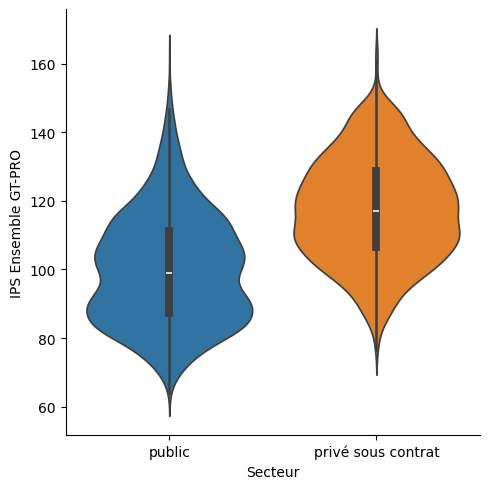

In [24]:
ips_data_secteur = ips_data[['Secteur','IPS Ensemble GT-PRO']]
plt.figure(figsize=(10,10))

sb.catplot(data=ips_data_secteur, x='Secteur', y='IPS Ensemble GT-PRO', kind='violin', hue='Secteur')
plt.show()

Néanmoins, il est intéressant de noter que même si la position sociale des individus en lycée privé est globalement plus élevée, cela ne demeure pas vrai dans le centre des grandes villes françaises, au sein desquelles le niveau d’IPS des lycées publics est relativement élevé. Cela s’explique par le coût de la vie dans les métropoles françaises ; en effet, pour pouvoir vivre dans le centre des grandes villes il faut nécessairement disposer de moyens financiers assez élevés. Les plus pauvres vont généralement s’excentrer dans les banlieues, où la vie est moins chère. Cela contribue donc à créer au sein des grandes villes certains quartiers favorisant l’entre-soi pour les plus aisés, cela explique donc le niveau d’IPS assez élevé dans le centre des grandes villes de France.

Afin d’analyser ces observations à travers des données chiffrées, j'ai calculé l’IPS moyen non pondéré des lycées privés puis des lycées publics. Nous pouvons dès lors observer une différence assez nette entre les deux puisque la moyenne du privé, d’indice IPS 117,4, est supérieure de 17 points d’indice IPS à la moyenne des lycées publics (100)


In [25]:
# calcul des moyennes pv et pb
ips_lycee_pv = ips_data[ips_data['Secteur']=='privé sous contrat']
print('Moyenne lycée privé :',round(ips_lycee_pv['IPS Ensemble GT-PRO'].mean(),1))
ips_lycee_pb = ips_data[ips_data['Secteur']=='public']
print('Moyenne lycée public :',round(ips_lycee_pb['IPS Ensemble GT-PRO'].mean(),1))

Moyenne lycée privé : 117.4
Moyenne lycée public : 100.0


 Pour pouvoir compléter notre analyse, j'ai ensuite calculé la médiane pour les lycées publics puis pour les privés. On observe donc que la médiane se rapproche grandement de la moyenne, ce qui indique donc qu’il n’existe quasiment pas de disparités dans le niveau d’IPS au sein des lycées publics et des privés. Nous pouvons ainsi en conclure que l’ensemble des lycées privés ont généralement un niveau d’IPS plus élevé que les publics. Cela vient donc corroborer notre analyse précédente, les familles les plus aisées placent leurs enfants en grande majorité au sein des lycées privés, ce qui explique donc l’écart d’IPS entre le public et le privé.


In [26]:
# calcul de la médiane pv et pb
ips_lycee_pv = ips_data[ips_data['Secteur']=='privé sous contrat']
print('Médiane lycée privé :',round(ips_lycee_pv['IPS Ensemble GT-PRO'].median(),1))
ips_lycee_pb = ips_data[ips_data['Secteur']=='public']
print('Médiane lycée public :',round(ips_lycee_pb['IPS Ensemble GT-PRO'].median(),1))

Médiane lycée privé : 117.0
Médiane lycée public : 99.0



Néanmoins, afin d'illustrer le dernier point de notre analyse, j'ai sélectionné l’un des lycées publics de Paris se situant dans un quartier parisien assez aisé, le lycée Victor Duruy dans le septième arrondissement de Paris.


In [27]:
ips_lycee_pb_paris = ips_data[(ips_data['Secteur']=='public')& (ips_data['Académie']=='PARIS')] # récupération des lycées situés exclusivement à Paris
ips_lycee_pb_paris.loc[ips_lycee_pb_paris["Nom de l'établissment"]=='LYCEE GENERAL VICTOR DURUY'] # récupération de la ligne du lycée Duruy

Rentrée scolaire Académie Code du département Département       UAI  \
1953        2022-2023    PARIS                 075       PARIS  0750662M   

           Nom de l'établissment Code INSEE de la commune  \
1953  LYCEE GENERAL VICTOR DURUY                    75107   

            Nom de la commune Secteur Type de lycée  Effectifs voie GT  \
1953  PARIS 7E ARRONDISSEMENT  public          LEGT              993.0   

      Effectifs voie PRO  Effectifs Ensemble GT-PRO  IPS voie GT  \
1953                 NaN                      993.0        145.2   

      IPS voie PRO  IPS Ensemble GT-PRO  Ecart-type de l'IPS voie GT  \
1953           NaN                145.2                         33.2   

      Ecart-type de l'IPS voie PRO  
1953                           NaN

Nous pouvons donc observer ici que cet établissement public a un IPS en voie générale et technologique de 145,2 ce qui est nettement supérieur à la médiane des lycées publics qui vaut 99. Cela montre donc bien que certains lycées publics situés dans des quartiers très favorisés ont un IPS très élevé, supérieur à la grande majorité des lycées privés. La localisation des lycées est donc déterminante pour l’IPS de ces derniers. Cela s’explique notamment par le prix des logements dans ces quartiers ; en effet, la majorité des habitants des alentours du lycée Victor Duruy sont nécessairement aisés à cause des prix de l’immobilier de ce quartier.
Nous avons souhaité poursuivre notre analyse quant aux lycées publics des grandes villes en étudiant la ville de Paris en globalité. Nous avons ainsi calculé la moyenne des IPS des lycées publics se situant uniquement dans la ville de Paris, nous obtenons ainsi une moyenne de 109,5 ainsi qu’une médiane de 106,8. Ainsi, la moyenne et la médiane des lycées publics parisiens sont plus élevées que la moyenne nationale des lycées publics. Nous remarquons ainsi une différence assez franche pour la moyenne ; toutefois, cela est moins marqué pour la médiane. La ville de Paris illustre donc bien un certain phénomène, les lycées publics des grandes villes ont un IPS plus élevé en moyenne que ceux situés dans des villes moyennes ou petites. Nous pouvons expliquer cela également par le niveau de vie des habitants des grandes villes qui est généralement plus élevé.


In [28]:
moy_pb_paris=ips_lycee_pb_paris['IPS Ensemble GT-PRO'].mean()
med_pb_paris=ips_lycee_pb_paris['IPS Ensemble GT-PRO'].median()
print("La moyenne de l'IPS des lycées publics à Paris est de : ",round(moy_pb_paris,1))
print("La médiane de l'IPS des lycées publics à Paris est de : ",round(med_pb_paris,1))

La moyenne de l'IPS des lycées publics à Paris est de :  109.5
La médiane de l'IPS des lycées publics à Paris est de :  106.8


Enfin, j'ai voulu étudier la position géographique et la localisation globale des lycées privés en France.

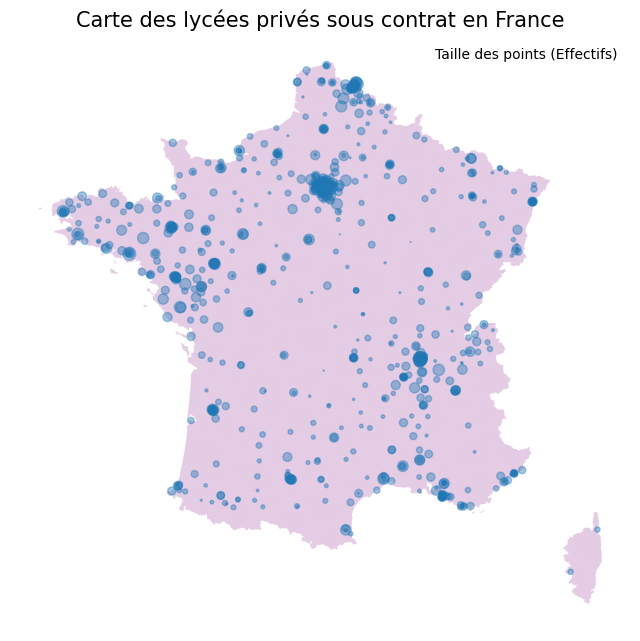

In [29]:
import pandas as pd

#jointure sur les etablissements
ips_general_data = pd.merge(ips_data, general_data, left_on='UAI', right_on='Identifiant_de_l_etablissement')

#division colonne position en 2 colonnes : longitude et lattitude
ips_general_data[['longitude','lattitude']] = ips_general_data['position'].str.split(',', expand=True)

ips_general_data_fr = ips_general_data[~ips_general_data['Académie'].isin(['MARTINIQUE','GUYANE','LA REUNION','MAYOTTE','GUADELOUPE'])]

ips_lycée_position= ips_general_data_fr[['UAI','longitude','lattitude','IPS Ensemble GT-PRO','Effectifs voie GT']]
#selection lycée voie G et T
ips_lycée_position_t = ips_general_data_fr[ips_general_data_fr['Secteur']=='privé sous contrat']


import geopandas as gpd
import matplotlib.pyplot as plt

# Convertir en GeoDataFrame
points = gpd.points_from_xy(ips_lycée_position_t['lattitude'], ips_lycée_position_t['longitude'])
DT_lycée_GT_position = gpd.GeoDataFrame(ips_lycée_position_t, geometry=points, crs='EPSG:4326')

# Normaliser les effectifs pour la taille des points
effectifs_normalized = DT_lycée_GT_position['Effectifs voie GT'] / DT_lycée_GT_position['Effectifs voie GT'].max() * 100

# Lire la carte des départements français
carte_fr = gpd.read_file('departements.geojson')
carte_fr = carte_fr.to_crs(DT_lycée_GT_position.crs)

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_axis_off()
# Plot de la carte de la France
carte_fr.plot(ax=ax, color='purple', alpha=0.2)

# Plot des points avec la taille normalisée selon l'effectifs et la couleur selon 'IPS Ensemble GT-PRO'
DT_lycée_GT_position.plot(
    ax=ax,
    legend=True,
    alpha=0.4,
    markersize=effectifs_normalized
)

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Taille des points (Effectifs)')
ax.set_title('Carte des lycées privés sous contrat en France', fontsize=15)

# Afficher la figure
plt.show()


Nous pouvons remarquer sur cette carte que les lycées privés sont majoritairement situés près de grandes villes ainsi que dans des zones densément peuplées. Les familles vivant dans les grandes villes et les zones urbaines ont généralement des revenus plus élevés que celles des zones rurales ou moins peuplées. Cela permet à un plus grand nombre de familles de payer les frais de scolarité des écoles secondaires privées, ce qui rend ces établissements plus rentables dans les zones urbaines. Les familles citadines, qui disposent souvent d'un revenu disponible plus élevé, sont plus enclines à investir dans l'éducation de leurs enfants, ce qui accroît la demande de lycées privés. En outre, les familles des grandes villes possèdent souvent un capital social et culturel plus élevé. Elles sont généralement bien informées sur les avantages de l'enseignement privé et disposent des réseaux nécessaires pour accéder à ces établissements. Ces connaissances et ce capital renforcent la demande de lycées privés. La ségrégation socio-spatiale, où les familles les plus aisées ont tendance à se regrouper dans certains quartiers urbains, crée des zones où la demande de lycées privés est élevée.


Malgré la tendance générale, le Nord de la France se distingue par un nombre important de lycées privés alors que l'IPS y est très faible. Cette situation illustre le fait que la seule présence de nombreux lycées privés ne garantit pas un IPS moyen élevé pour un département.


# 6. Étude de cas : DL IASO de Paris Dauphine

J'ai voulu nous pencher sur le cas de notre classe, pour donner un exemple et observer ce que nous pouvions obtenir à partir des données relatives aux IPS. Ainsi, nous avons rassemblé dans un tableau excel les lycées de chaque personne de la classe avec sa position géographique (latitude, longitude) ainsi que l’IPS des lycées. Nous avons ensuite converti ce fichier en csv et effectué les modifications nécessaires ci-dessous :


In [30]:
from math import sqrt
dl_data = pd.read_csv("dl_data.csv",sep=";")
dl = dl_data[dl_data["ips_2022"].notna()]

Dans le fichier excel que nous avons créé, il y avait aussi le nom des personnes venant de l'étranger. Toutefois, nous n'avons pas pu trouver d'IPS pour les lycées étrangers, donc nous enlevons les données 'None'.


In [31]:
dl['longitude'] = dl['longitude'].str.replace(',', '.').astype(float)
dl['latitude'] = dl['latitude'].str.replace(',', '.').astype(float)

<ipython-input-31-0596d9c0ee9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl['longitude'] = dl['longitude'].str.replace(',', '.').astype(float)
<ipython-input-31-0596d9c0ee9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl['latitude'] = dl['latitude'].str.replace(',', '.').astype(float)


Calcul de la moyenne des IPS des lycées des étudiant de la DL IASO & de la moyenne nationale en 2022 :


In [32]:
a=dl['ips_2022'].mean()
b=ips_data['IPS Ensemble GT-PRO'].mean()
print(a,'\n',b)

136.768 
 105.79505280711506


Calcul de la médiane et de l’écart-type des IPS des lycées des étudiant de la DL IASO :


In [33]:
dl['ips_2022'].median()

143.0

In [34]:
dl['ecart']=(abs(dl['ips_2022']-dl['ips_2022'].mean()))**2
ecart=sqrt((dl['ecart'].sum())/dl.shape[0])
print("L'écart-type des IPS dans la classe est de : ",round(ecart,1))

L'écart-type des IPS dans la classe est de :  17.9


<ipython-input-34-d80d4e00772a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl['ecart']=(abs(dl['ips_2022']-dl['ips_2022'].mean()))**2


Afin de mettre en perspective l’IPS moyen de la double licence IASO (136,8), nous pouvons la comparer avec la moyenne française qui est d’indice 106, soit une différence de plus de 30 points d’indice IPS. Ainsi, en moyenne, un élève de la double licence IASO provient d’un lycée dont l’indice d’IPS est environ 1,3 fois plus élevé que celui d’un lycéen français (en général et technologique ou professionnel). Nous pouvons donc observer que les IPS des lycées d’où viennent les élèves sont supérieurs au reste des lycées français. Cela met donc en lumière la position sociale des élèves de la double licence qui semble donc assez élevée. Ce qui confirme donc nos autres conclusions sur le lien entre la zone géographique et la position sociale. En effet, la majorité des élèves de la double licence proviennent de lycées situés dans des grandes villes (Paris, Lyon, Reims…) ou bien de départements favorisés comme les Hauts-de-Seine ou bien les Yvelines. De plus, la médiane de la double licence vaut 143, 50 % des IPS des lycées sont donc inférieurs à 143, et 50 % sont supérieurs à 143. La médiane est donc supérieure de 6 points d’indice IPS, ce qui peut donc suggérer une asymétrie dans la distribution des données. Puisque la médiane est supérieure à la moyenne, la distribution est probablement asymétrique à gauche, signifiant qu'il existe des valeurs très faibles par rapport à la moyenne, diminuant la valeur de la moyenne. Aussi, l’étude de l'écart type, mesurant la dispersion des données autour de la moyenne vient compléter notre analyse. Un écart-type de 17,9 indique que les valeurs observées s'écartent en moyenne de 17,9 points d’indice de la moyenne. Le calcul de l’écart-type indique une variabilité modérée ; en effet,  les valeurs sont relativement dispersées autour de la moyenne même si certaines valeurs sont bien inférieures à celle-ci.


Création d'une carte mettant en évidence les IPS des lycées d’origine


<Axes: >

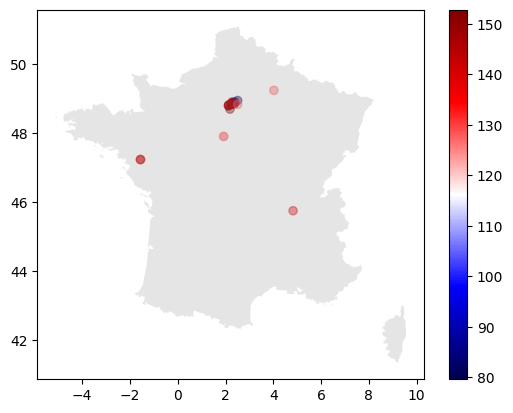

In [35]:
carte = gpd.GeoDataFrame(dl, geometry=gpd.points_from_xy(dl.longitude,dl.latitude))
fig, ax = plt.subplots()
carte.set_crs(epsg=4326, inplace=True)
carte.plot(ax=ax,column='ips_2022',cmap='seismic',legend=True, alpha=0.4)
carte_dep= gpd.read_file("departements.geojson")
carte_dep = carte_dep.to_crs(carte.crs) # coordonne les coordonnées entre elles, superpose dans le même plan
carte_dep.plot(ax=ax, color='grey',alpha=0.2) # affiche

In [36]:
!pip install folium matplotlib mapclassify

In [37]:
carte.explore(column='ips_2022', cmap='seismic', legend=True)

J'ai également pu collecter des statistiques relatives aux élèves admis en double licence IASO pour l’année 2023 sur le site de parcoursup. Cela vient à nouveau corroborer nos constatations précédentes, quant à la corrélation entre l’IPS du lycée et le niveau de mentions au bac. Nous pouvons remarquer que la totalité des élèves ont obtenu la mention très bien au baccalauréat ce qui montre bien le lien entre la position sociale des parents et la réussite de leurs enfants. En outre, nous pouvons remarquer que la majorité des élèves proviennent de la même académie (Paris) mais surtout qu’une grande majorité des élèves, 78%, provient de lycées situés en Île-de-France. Cela vient donc également confirmer les observations que nous avions pu réaliser sur les cartes interactives. Ainsi, nous pouvons donc conclure que la promotion 2023 de la double licence IASO de Paris-Dauphine est représentative du reste des lycéens. L’analyse de cette classe met bien en exergue le lien entre un niveau d’IPS élevé et un très bon niveau scolaire. Toutefois, il est intéressant de noter que certains des élèves proviennent de lycée dont l’IPS est moins élevé (79,6 par exemple), ce qui montre bien que certains élèves réussissent très bien tout en venant de familles moins aisées.
Nous avons donc de grandes disparités en termes d’origine sociale au sein de la double licence, avec une étendue de 73,2 points d’indice IPS (max-min = 152,8 - 73,2 = 73,2), ce qui est considérable. Cela signifie que l’élève provenant du lycée le plus favorisé avait un niveau d’IPS presque deux fois supérieur à celui du lycée dont l’IPS est le plus faible. Nous pouvons ainsi conclure que la majorité des étudiants de la double licence IASO proviennent de milieux plutôt aisés, même si nous pouvons relever une certaine mixité sociale au vu des grandes disparités en termes d’IPS.



Données relatives aux mentions et au lycée d’origine des étudiants de la DL IASO
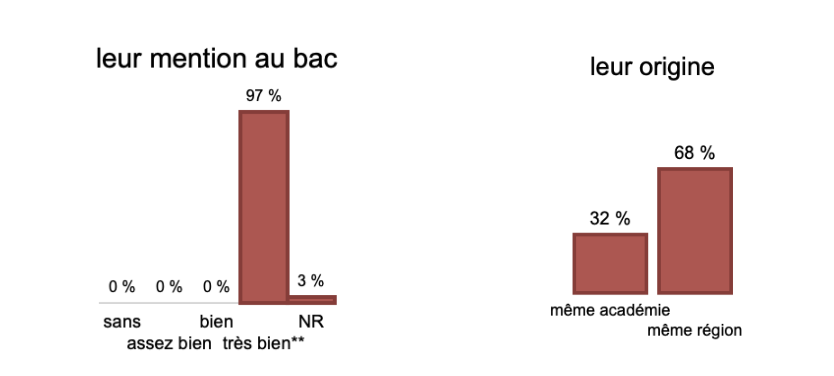

#7. Lycée général & technologique et lycée professionnel : quelles différences ?


# Nouvelle section
L’analyse des stratégies d’orientation des familles nous amène à analyser l’origine sociale des élèves en fonction de leur section, général/technologique ou bien professionnel. Cela s’explique principalement par les choix effectués par les familles en matière d’orientation, d’établissement, de filière, dans l’espoir de maximiser les chances de réussite de leurs enfants. À chaque palier d’orientation, l’individu compare le coût probable de la poursuite de ses études et les avantages qu’il en attend, en termes de salaire et des prestiges futurs. Un enfant de milieu modeste tendra donc à privilégier des études courtes, qui d’ailleurs suffisent à lui permettre de faire mieux que ses parents. À l’inverse, les familles aisées cherchent à choisir les établissements les plus favorisés, ce qui réduit la mixité sociale et aggrave les inégalités scolaires. Les lycées professionnels visent une insertion rapide sur le marché du travail avec des formations pratiques et techniques, tandis que les lycées généraux préparent les élèves à des études supérieures théoriques et académiques. Cela explique donc en partie pourquoi les individus les moins aisés se tournent plus facilement vers les lycées professionnels, leur permettant d’être formés rapidement et leur offrant la possibilité de gagner rapidement de l’argent.
En outre, ces deux sections n’ont pas la même signification sociale et n'offrent pas le même niveau de prestige. En ce sens, les lycées généraux bénéficient d'un prestige social supérieur dès lors qu’ils permettent d’accéder à des formations élitistes. D’autre part, les lycées professionnels sont socialement moins bien vu en étant considéré telle qu’une voie secondaire pour les élèves en difficulté scolaire. La filière professionnelle est ainsi perçue comme une section destinée aux élèves en difficultés qui n’ont pas les capacités nécessaires pour rester en général. C’est donc pour cela que les familles aisées encouragent leurs enfants à rester en général, malgré les coûts potentiels que cela implique.


Moyenne des IPS pondérés en fonction des filières générale/technologique et professionnelle


In [38]:
full_data = pd.merge(ips_data, general_data, left_on='UAI', right_on='Identifiant_de_l_etablissement') # faire une jointure
full_data=full_data[['UAI','IPS voie GT','IPS voie PRO','Effectifs voie GT','Effectifs voie PRO']] #prendre que les données dont on va se servir

In [39]:
nv=full_data
nv['pond_GT']=full_data['IPS voie GT']*full_data['Effectifs voie GT'] # afin d'ensuite calculer la moyenne pondérée
nv['pond_PRO']=full_data['IPS voie PRO']*full_data['Effectifs voie PRO']
moy_pond_gt=nv['pond_GT'].sum() # on additionne tout les IPS multiplier par l'effectif
moy_pond_pro=nv['pond_PRO'].sum()
print('Moyenne pondéré IPS, lycée GT :',round(moy_pond_gt/full_data['Effectifs voie GT'].sum(),1),'Moyenne pondéré IPS, lycée PRO :',round(moy_pond_pro/full_data['Effectifs voie PRO'].sum(),1))
print('différence :',round(moy_pond_gt/full_data['Effectifs voie GT'].sum()-moy_pond_pro/full_data
 ['Effectifs voie PRO'].sum(),1)) # on n'a plus qu'à diviser par les effectifs respectifs

Moyenne pondéré IPS, lycée GT : 115.0 Moyenne pondéré IPS, lycée PRO : 88.9
différence : 26.1


Niveaux maximum et minimum de l’IPS pour les lycées G&T et pour les lycées PRO

In [40]:
max_gt=full_data['IPS voie GT'].max() #max GT
min_gt=full_data['IPS voie GT'].min() #min GT
max_pro=full_data['IPS voie PRO'].max() #max GT
min_pro=full_data['IPS voie PRO'].min() #min PRO
print('le minimum IPS des lycée GT est : ',min_gt,' et le maximum est: ',max_gt,
      '\n le minimum IPS dans les lycées PRO est : ',min_pro,' et le maximum est : ',max_pro)


le minimum IPS des lycée GT est :  67.9  et le maximum est:  163.0 
 le minimum IPS dans les lycées PRO est :  62.3  et le maximum est :  133.2


Afin d’envisager au mieux le lien entre le niveau d’IPS et la filière des étudiants (générale/technologique ou professionnelle), j'ai calculé la moyenne des IPS des lycées en ne prenant en compte uniquement les lycées généraux, puis uniquement les lycées professionnels tout en pondérant avec les effectifs. Ainsi, l’IPS moyen pour un élève en section générale et technologique est de 115 tandis que l’IPS moyen dans la filière professionnelle est de 88,9, ce qui correspond donc à une différence de 66 points d’indice IPS. En ce sens, un élève dans la section générale fréquente un lycée dont l’IPS est en moyenne 1,3 fois plus élevé. Cette observation statistique confirme donc ce que nous avons énoncé plus haut. En effet, les individus issus d’un milieu favorisé vont davantage s’orienter vers les lycées généraux et technologiques, notamment dans l’idée de poursuivre de longues études in fine.



En outre, nous remarquons une étendue plus importante pour les lycées généraux et technologiques avec un IPS maximum de 163 et un minimum de 67,9 tandis que pour les lycées professionnels l’IPS maximum est de 133,2 et le minimum de 62,3. En ce sens, nous remarquons que les minimums en termes d’IPS ne sont pas très différents toutefois nous relevons une nette différence pour les maximums. Cela reflète donc le phénomène par lequel les familles les plus aisées encouragent leurs enfants à réaliser de longues études et donc s’orienter vers les lycées généraux ou technologiques. Nous avons donc logiquement des niveaux d’IPS plus élevés pour les lycées généraux. Tandis que la majorité des élèves en filière professionnelle proviennent de milieux modestes, souhaitant réaliser de courtes études afin de gagner leur vie rapidement.


Écart-type des IPS en fonction des filières générale/technologique et professionnelle






In [41]:
from math import sqrt
moy_gt=full_data['IPS voie GT'].mean() #moyenne GT
moy_pro=full_data['IPS voie PRO'].mean()
full_data['ecart_pro']=abs(moy_pro-full_data['IPS voie PRO'])**2
full_data['ecart_gt']=abs(moy_gt-full_data['IPS voie GT'])**2
colonne_gt=full_data[['Effectifs voie GT']]
colonne_pro=full_data[['Effectifs voie PRO']]
colonne_gt=colonne_gt[colonne_gt['Effectifs voie GT'].notna()] # pour récuperer seulement ceux ayant des voies GT
colonne_pro=colonne_pro[colonne_pro['Effectifs voie PRO'].notna()]  # pour récuperer seulement ceux ayant des voies PRO
ecart_type_pro=sqrt((full_data['ecart_pro'].sum())/(colonne_pro.shape[0]))
ecart_type_gt=sqrt((full_data['ecart_gt'].sum())/(colonne_gt.shape[0]))
print("L'écart-type des IPS des lycées pro est : ", round(ecart_type_pro,1)
,'\n Celui des lycées GT est : ',round(ecart_type_gt,1))

L'écart-type des IPS des lycées pro est :  11.6 
 Celui des lycées GT est :  14.7


Enfin, j'ai finalement calculé l’écart type des IPS à la fois pour les lycées professionnels et puis pour les lycées généraux et technologiques. Nous pouvons observer que l’écart-type des IPS pour les lycées professionnels est plus faible que pour les lycées généraux, ce qui corrobore ce que nous avons vu précédemment en calculant les étendues. Il semble qu’il existe plus de disparités au sein des lycées généraux et technologiques en termes d’IPS. Nous pouvons expliquer ceci par la massification scolaire ; il s’agit du processus par lequel l’accès aux études secondaires et supérieures s’est progressivement ouvert à tous les jeunes. La durée de scolarisation s’est accélérée dans les années 1950, elle est aujourd’hui de 19 ans alors qu’elle était de 8 ans en 1900. Puis, durant les années 1980 est apparu l’objectif des 80% d’accès au baccalauréat. Enfin, depuis 2010, nous relevons une forte progression du taux d’accès au bac + explosion des effectifs d’étudiants inscrits dans le supérieur. Ce processus de massification explique notamment les disparités d’IPS pour la filière générale et technologique. En effet, à travers les processus de massification et de démocratisation scolaire, la filière générale est devenue davantage plébiscitée par les classes populaires, ce qui a donc contribué à créer de grandes différences en termes d’IPS au sein de la filière générale et technologique.


# 8. L’évolution du niveau d’IPS


Finalement, pour pouvoir compléter mon analyse, j'ai étudié l’évolution de l’IPS de manière globale, puisque j'ai à disposition les données relatives à l’IPS des lycées sur les cinq dernières années.


Evolution de l’IPS sur les 5 dernières années


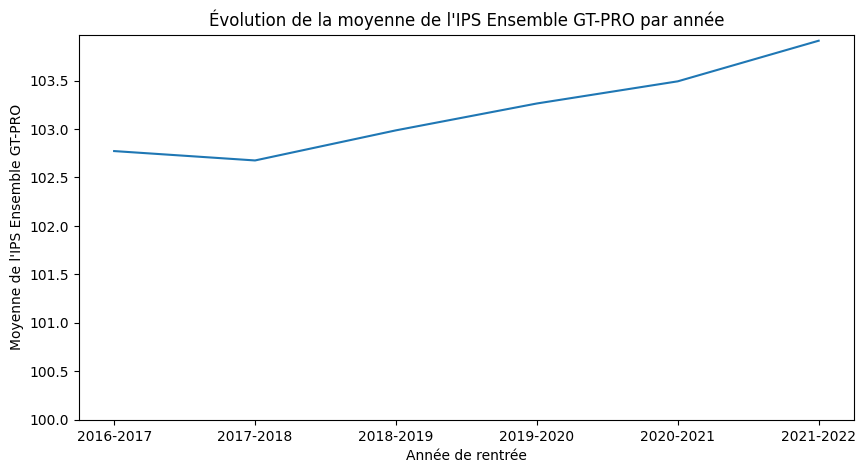

In [42]:
ips_data_full=pd.read_csv('ips_data_full.csv',sep=';')
mean_ips_per_year = ips_data_full.groupby(ips_data_full['Rentrée scolaire'])['IPS Ensemble GT-PRO'].mean()
plt.figure(figsize=(10, 5))
mean_ips_per_year.plot(kind='line')
plt.title('Évolution de la moyenne de l\'IPS Ensemble GT-PRO par année')
plt.xlabel('Année de rentrée')
plt.ylabel('Moyenne de l\'IPS Ensemble GT-PRO')
plt.ylim(100, plt.ylim()[1])
plt.show()

Text(0.5, 1.0, "Évolution de la moyenne de l'IPS Ensemble GT-PRO par année")

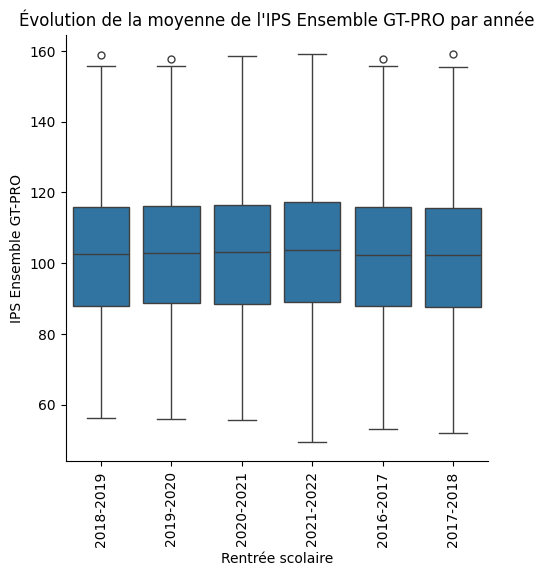

In [43]:
sb.catplot(x="Rentrée scolaire",y='IPS Ensemble GT-PRO',data=ips_data_full, kind='box')
plt.xticks(rotation=90)
plt.title('Évolution de la moyenne de l\'IPS Ensemble GT-PRO par année')

Nous observons donc une augmentation de l'IPS moyen de 102,7 environ en 2016 à 104 en 2021. Même si cette augmentation est assez faible en termes de pourcentage annuel, elle reflète cependant des tendances positives dans les conditions socio-économiques des français, mais aussi une hausse des investissements dans l'éducation. Aussi, les politiques visant à réduire les inégalités économiques peuvent avoir un impact positif sur les IPS des lycées, notamment dans les zones historiquement défavorisées en améliorant les conditions matérielles ainsi que l’accès à la culture des lycéens.

#Conclusion

Au terme de l’analyse, l’IPS du lycée d’origine a un impact déterminant dans la réussite ainsi que dans le futur scolaire des individus en France. En effet, il semble que dès la naissance d’un individu, ce dernier a des chances différentes du reste de la population pour accéder aux études les plus prestigieuses. Tout d’abord, nous avons observé que les revenus ainsi que les moyens financiers des parents, que nous avons analysés au prisme de la nomenclature des CSP, influencent plus particulièrement les stratégies d’orientation ainsi que l’investissement des familles dans l’éducation. Aussi, il est à noter que les ressources matérielles dont disposent les individus dépendent également de l’origine sociale et ont des conséquences importantes sur la réussite des élèves. Puis, nous avons envisagé l’impact de l’accès à la culture, à travers l’IPS ainsi que l’indice d’éloignement. Nos études statistiques nous ont montré que les individus provenant de lycées ayant un IPS plus élevé ont souvent un meilleur accès à la culture, et développent des compétences socialement valorisées. Par ailleurs, nous avons étendu notre réflexion sur l’éloignement à travers l’étude des départements d’Outre-Mer, au sein desquels les IPS sont très faibles en moyenne. Nous avons poursuivi en distinguant notre analyse entre les lycées privés et les lycées publics ; en effet, nous avons pu relever une différence en termes d’IPS entre ces deux catégories, étant donné que les lycées privés sont davantage plébiscités par les milieux favorisés. Aussi, nous avons envisagé les différences d’IPS entre les lycées professionnels et les lycées général et technologiques. La conclusion est liée avec les différences de stratégie d’orientation des familles, en fonction de leur origine sociale. En effet, les familles les plus modestes se tournent davantage vers des études courtes à l’inverse des classes supérieures. Enfin, nous avons étudié le cas de la double licence IASO de dauphine, qui est une formation assez sélective. Les résultats statistiques quant à cette formation ont globalement confirmé l’ensemble de nos résultats. Nous avons achevé notre enquête par la description de l’évolution du niveau d’IPS moyen, qui semble augmenter quelque peu chaque année mais demeure globalement assez stable.